In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
%matplotlib inline
sns.set_context("notebook")

# 2014 expenditure the US spent on foreign aid. 
# Found here: https://explorer.usaid.gov/query
aid = pd.read_csv("data/us_aid.csv")

for attribute in aid:
    print attribute

id
country_id
country_code
country_name
region_id
region_name
income_group_id
income_group_name
income_group_acronym
implementing_agency_id
implementing_agency_acronym
implementing_agency_name
implementing_subagency_id
subagency_acronym
subagency_name
channel_category_id
channel_category_name
channel_subcategory_name
channel_subcategory_id
channel_id
channel_name
dac_category_id
dac_category_name
dac_sector_code
dac_sector_name
dac_purpose_code
dac_purpose_name
funding_account_id
funding_account_name
assistance_category_id
assistance_category_name
activity_id
activity_name
activity_project_number
activity_start_date
activity_end_date
transaction_type_id
transaction_type_name
fiscal_year
current_amount
constant_amount
funding_agency_id
funding_agency_name
funding_agency_acronym
aid_type_group_id
aid_type_group_name


In [3]:
# Let's look at the development assistance committee categories
aid['dac_category_name'].unique()

array(['Health and Population', 'Other', 'Humanitarian', 'Governance',
       'Agriculture', 'Infrastructure', 'Economic Growth', 'Education',
       'Commodity Assistance'], dtype=object)

In [49]:
def total_costs(dataframe, region_label, cost_label):
    costs = {}
    for index,row in dataframe.iterrows():
        region = row[region_label]
        cost = row[cost_label]
        if cost >= 0:
            if region in costs:
                costs[region] += cost
            else:
                costs[region] = cost
    return costs

def costs_of(category, region_label, cost_label):
    aid_category = aid[aid.dac_category_name == category]
    return total_costs(aid_category, region_label, cost_label)

def dict_to_df(dictionary, cols):
    return pd.DataFrame(dictionary.items(), columns=cols)

education_costs = costs_of('Education', 'region_name', 'current_amount')
education_df = dict_to_df(education_costs, ['Region', 'Total Costs'])
education_df

,Region,Total Costs
0,East Asia and Oceania,172702737
1,Europe and Eurasia,60787627
2,Sub-Saharan Africa,314071449
3,Western Hemisphere,68431191
4,World,139517998
5,South and Central Asia,249005121
6,Middle East and North Africa,127928559


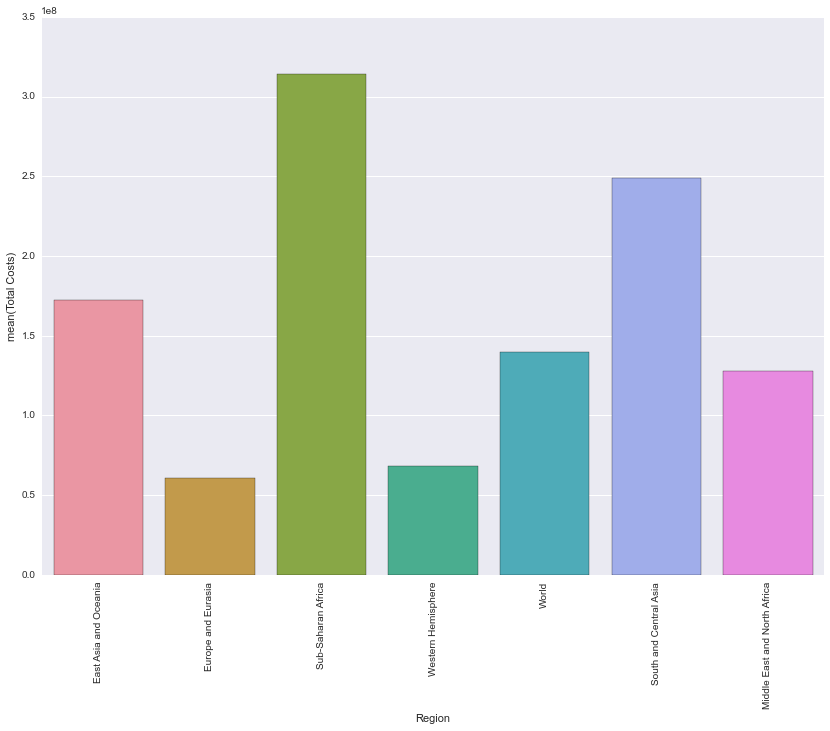

In [50]:
def plot_costs(costs, xlabel, ylabel):
    plt.figure(figsize=(14, 10))
    cost_plot = sns.barplot(data=costs, x=xlabel, y=ylabel)
    cost_plot.set_xticklabels(costs[xlabel], rotation=90)

plot_costs(education_df, 'Region', 'Total Costs')

In [52]:
country_edu_labels = ['Country', 'Education Expenditure']
country_edu_costs = costs_of('Education', 'country_name', 'current_amount')
country_edu_df = dict_to_df(country_edu_costs, country_edu_labels)
country_edu_df.sort(country_edu_labels[1])

,Country,Education Expenditure
102,Botswana,3361
84,Nepal,15356
101,Paraguay,17345
81,Cote d'Ivoire,20694
83,Southern Africa Region,24313
47,Angola,25000
49,Fiji,47016
75,Uzbekistan,50000
0,Turkmenistan,50000
65,Belize,87863


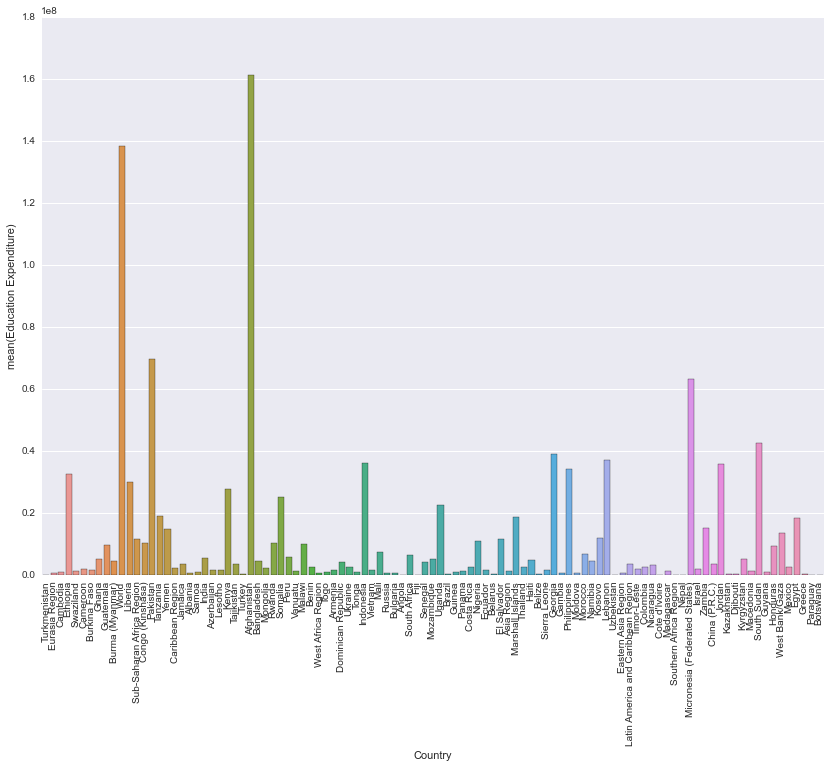

In [53]:
plot_costs(country_edu_df, country_edu_labels[0], country_edu_labels[1])


In [54]:
country_finance_names = ['Country', 'Economic Expenditure']
country_finance_costs = costs_of('Economic Growth', 'country_name', 'constant_amount')
country_finance_df = dict_to_df(country_finance_costs, country_finance_names)
country_finance_df.sort(country_finance_names[1])

,Country,Economic Expenditure
85,Nepal,4229
105,Comoros,10973
84,Southern Africa Region,12784
39,Ecuador,24631
81,Burundi,60722
57,Guinea,83627
48,Romania,84682
7,Burkina Faso,95070
18,Cabo Verde,123156
23,Uruguay,130289


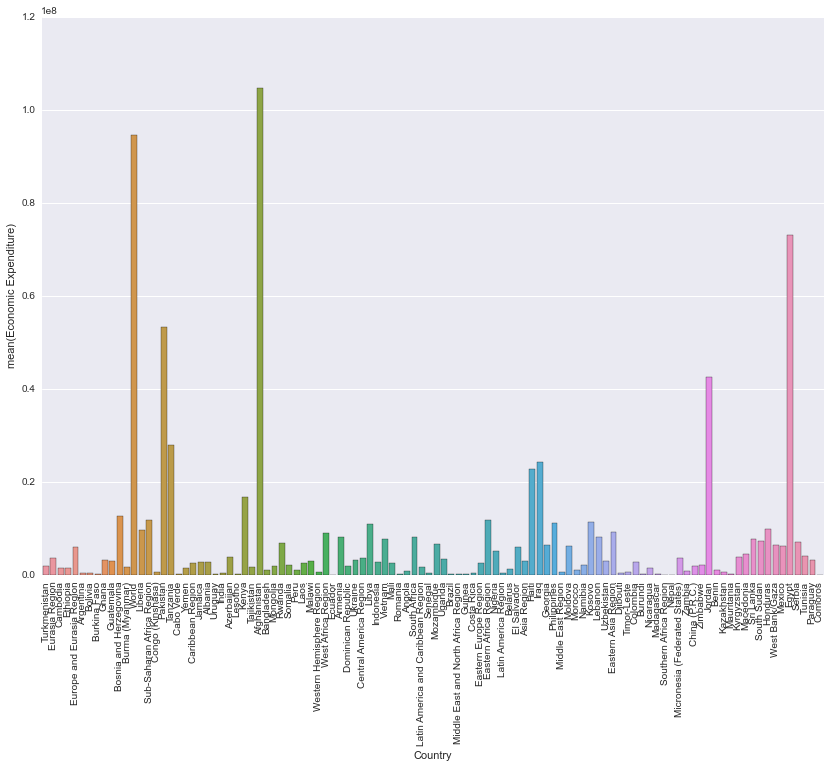

In [55]:
plot_costs(country_finance_df, country_finance_names[0], country_finance_names[1])


In [66]:
hdi = pd.read_csv("data/HDI.csv")
foreign_aid = pd.merge(hdi,country_finance_df, on='Country', how='outer')
foreign_aid = pd.merge(foreign_aid,country_edu_df, on='Country', how='outer')
foreign_aid[country_finance_names[1]] = foreign_aid[country_finance_names[1]].fillna(0)
foreign_aid[country_edu_labels[1]] = foreign_aid[country_edu_labels[1]].fillna(0)
foreign_aid.sort('Education Expenditure')



,HDI rank,Country,2013 HDI Value,2013 Life Expectancy at Birth (years),2013 Life Expectancy at Birth (years) Note,2012 Mean years of schooling,2012 Mean years of schooling Note,2012 Expected years of schooling,2012 Expected years of schooling Note,2013 Gross national income (GNI) per capita (2011 PPP $),2013 Gross national income (GNI) per capita (2011 PPP $) Note,2012 Human Development Index (HDI) value,2012 Human Development Index (HDI) value Note,2012-2013 Change in rank,Economic Expenditure,Education Expenditure
0,1,Norway,0.944,81.5,NaN,12.6,NaN,17.6,NaN,63909,NaN,0.943,NaN,0,0,0
96,97,Saint Lucia,0.714,74.8,NaN,8.3,p,12.8,NaN,9251,NaN,0.715,NaN,-4,0,0
190,NaN,Nauru,NaN,NaN,NaN,NaN,NaN,9.3,NaN,NaN,NaN,NaN,NaN,NaN,0,0
191,NaN,San Marino,NaN,NaN,NaN,NaN,NaN,15.3,NaN,NaN,NaN,NaN,NaN,NaN,0,0
93,93,Dominica,0.717,77.7,d,7.7,p,12.7,n,9235,NaN,0.716,NaN,-1,0,0
92,93,Algeria,0.717,71.0,NaN,7.6,NaN,14.0,NaN,12555,NaN,0.715,NaN,0,0,0
91,91,Saint Vincent and the Grenadines,0.719,72.5,NaN,8.6,p,13.3,NaN,10339,NaN,0.717,NaN,0,0,0
90,91,China,0.719,75.3,NaN,7.5,NaN,12.9,NaN,11477,NaN,0.715,NaN,2,0,0
89,90,Tunisia,0.721,75.9,NaN,6.5,NaN,14.6,NaN,10440,NaN,0.719,NaN,0,3941007,0
194,NaN,Tuvalu,NaN,NaN,NaN,NaN,NaN,10.8,NaN,5151,NaN,NaN,NaN,NaN,0,0


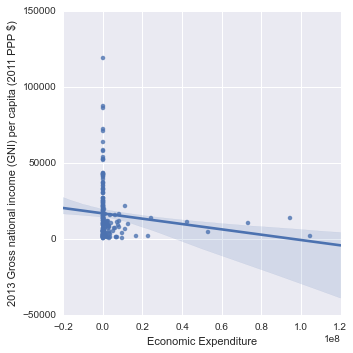

In [58]:
sns.lmplot(x="Economic Expenditure", y="2013 Gross national income (GNI) per capita (2011 PPP $)", data=foreign_aid)

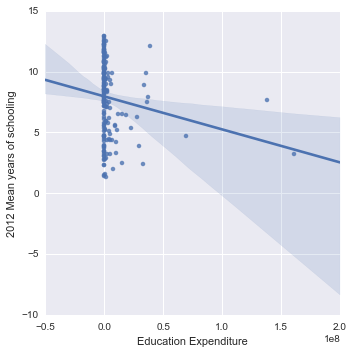

In [61]:
sns.lmplot(x="Education Expenditure", y="2012 Mean years of schooling", data=foreign_aid)

In [65]:
foreign_aid[foreign_aid.Country == "Pakistan"]

#Micronesia (Federated States) 	63213822
#14 	Pakistan

,HDI rank,Country,2013 HDI Value,2013 Life Expectancy at Birth (years),2013 Life Expectancy at Birth (years) Note,2012 Mean years of schooling,2012 Mean years of schooling Note,2012 Expected years of schooling,2012 Expected years of schooling Note,2013 Gross national income (GNI) per capita (2011 PPP $),2013 Gross national income (GNI) per capita (2011 PPP $) Note,2012 Human Development Index (HDI) value,2012 Human Development Index (HDI) value Note,2012-2013 Change in rank,Economic Expenditure,Education Expenditure
145,146,Pakistan,0.537,66.6,NaN,4.7,NaN,7.7,NaN,4652,NaN,0.535,NaN,0,53178722,69496728
